In [1]:
import pandas as pd
import missingno as msno
import plotly.express as px

%matplotlib inline

## Get Data Set

In [2]:
#Get CSV from OWID
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
df_country_info = pd.read_csv(url, sep=',')
df_country_info.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df_country_info["location"].unique()
df_country_info["iso_code"].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GGY', 'GIN',
       'GNB', 'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU',

In [5]:
#Save Data in Structure
df_country_info.to_csv('../data/raw/covid_full_data.csv', ';')

## Select Data

In [6]:
list_of_countries = ['Germany', 'United States', 'Taiwan']
binary_selector = [1,2,3]

#get all entries where country is in
df_country_info[df_country_info['location'] == list_of_countries[0]]

print(len(list_of_countries))

binary_selector[0] = df_country_info['location'] == list_of_countries[0]
binary_selector[1] = df_country_info['location'] == list_of_countries[1]
binary_selector[2] = df_country_info['location'] == list_of_countries[2]

#Combine Binary Searches
b_allSelectedCountries = (binary_selector[0]|binary_selector[1]|binary_selector[2])


#Create Dataframe
df_allSelectedCountries = df_country_info[b_allSelectedCountries]

3


<AxesSubplot:>

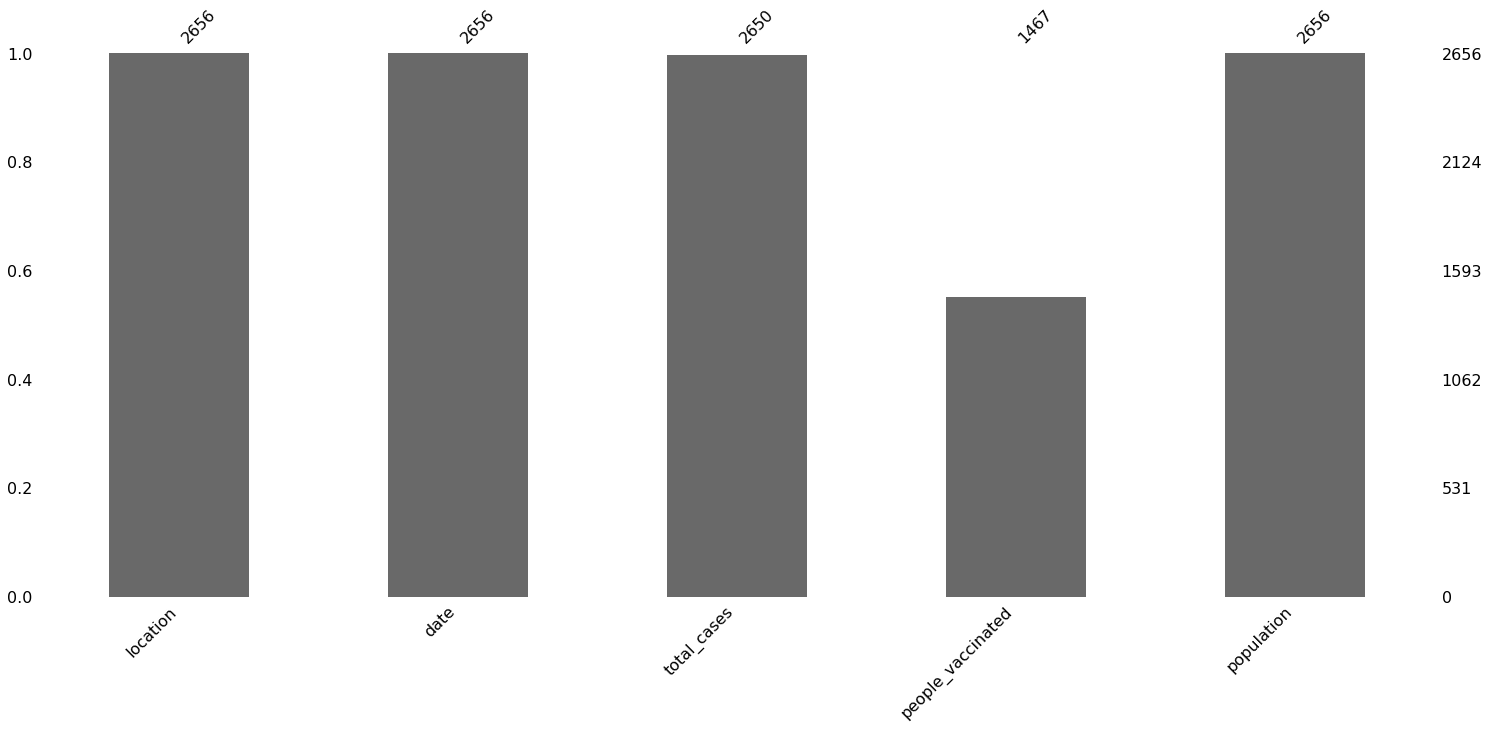

In [7]:
#quick Check if Dataset is complete
msno.bar(df_allSelectedCountries[['location', 'date', 'total_cases', 'people_vaccinated', 'population']])

## Basic Plotting

In [8]:
#Plotly Line Plots
fig = px.line(df_allSelectedCountries, x="date", y="total_cases", color="location", title="COVID Cases GER")
fig.show()

In [9]:
# Joint Operator -> Tricky to normalize
df_GER['total_cases']/df_GER['population']

NameError: name 'df_GER' is not defined

In [ ]:
#Auch möglich
df_GER['total_cases']/83000000

66199    1.204819e-08
66200    4.819277e-08
66201    4.819277e-08
66202    4.819277e-08
66203    6.024096e-08
             ...     
67073    3.278542e-01
67074    3.293373e-01
67075    3.307738e-01
67076    3.322119e-01
67077    3.335154e-01
Name: total_cases, Length: 879, dtype: float64

In [ ]:
#normalize
df_allSelectedCountries['total_cases_norm'] = df_allSelectedCountries['total_cases']/df_allSelectedCountries['population']

C:\Users\Eric\AppData\Local\Temp\ipykernel_29424\1490996337.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
figAllNormalized = px.line(df_allSelectedCountries, x="date", y="total_cases_norm", color="location", title="COVID Cases")
figAllNormalized.show()

## Vaccination Rate

In [ ]:
figVacAll = px.line(df_allSelectedCountries, x="date", y="people_vaccinated", color="location", title="Total Vaccinations")
figVacAll

In [ ]:
#normalized Vaccs

df_allSelectedCountries['people_vaccinated_norm'] = df_allSelectedCountries['people_vaccinated']/df_allSelectedCountries['population']

figVacAll_norm = px.line(df_allSelectedCountries, x="date", y="people_vaccinated_norm", color="location", title="Total Vaccinations normalized")
figVacAll_norm

C:\Users\Eric\AppData\Local\Temp\ipykernel_29424\2846130388.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

